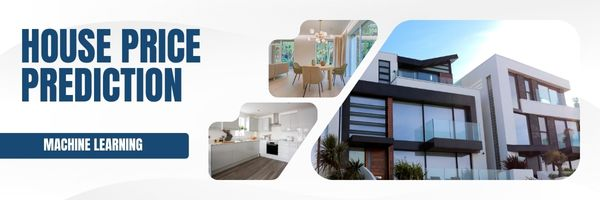

<span style="font-family: Arial; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #0074cc;">Prodigy InfoTech - Machine Learning Internship</span>
<hr style="height: 0.5px; border: 0; background-color: #0074cc;">

<span style="font-family: Arial; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #0074cc;">Task- 01</span>
<hr style="height: 0.5px; border: 0; background-color: #0074cc;">

# Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

# Importing Libraries

In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer

In [111]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Preprocessing

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 81)

In [6]:
print("The dataset has {num_columns} columns and {num_rows} rows".format(num_columns = df.shape[1]
                                                                         ,num_rows = df.shape[0]))

The dataset has 81 columns and 1460 rows


In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Null Value Treatment

In [8]:
df.isnull().sum()[df.isnull().sum()!=0]/df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Above results indicates the percentage of null values in the variable
Dropping the columns having null values above 50%

In [9]:
df.drop(columns=['Fence', 'MiscFeature', 'PoolQC', 'Alley'],inplace=True)

In [10]:
df.shape

(1460, 77)

After dropping our dataset it contains 77 columns before with was 81 columns.

In [11]:
df.select_dtypes(include=np.number).isnull().sum()[df.select_dtypes(include=np.number).isnull().sum()!=0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [13]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [14]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

In [15]:
df.select_dtypes(include='number').isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [16]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()!=0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [17]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [18]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [19]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)

In [20]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)

In [21]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)

In [22]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [23]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

In [24]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [25]:
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [26]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [27]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [28]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [29]:
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [30]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

# Outliers Treatment

In [31]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df1=df[~(((df>ul)|(df<ll)).any(axis=1))]
df1.shape

(557, 77)

In [32]:
df.shape

(1460, 77)

# Data Visualization

# Univariate Analysis

In [33]:
df.drop("Id",axis=1,inplace=True)

In [34]:
num=df.select_dtypes(include=np.number).columns
num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
num1=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt',]

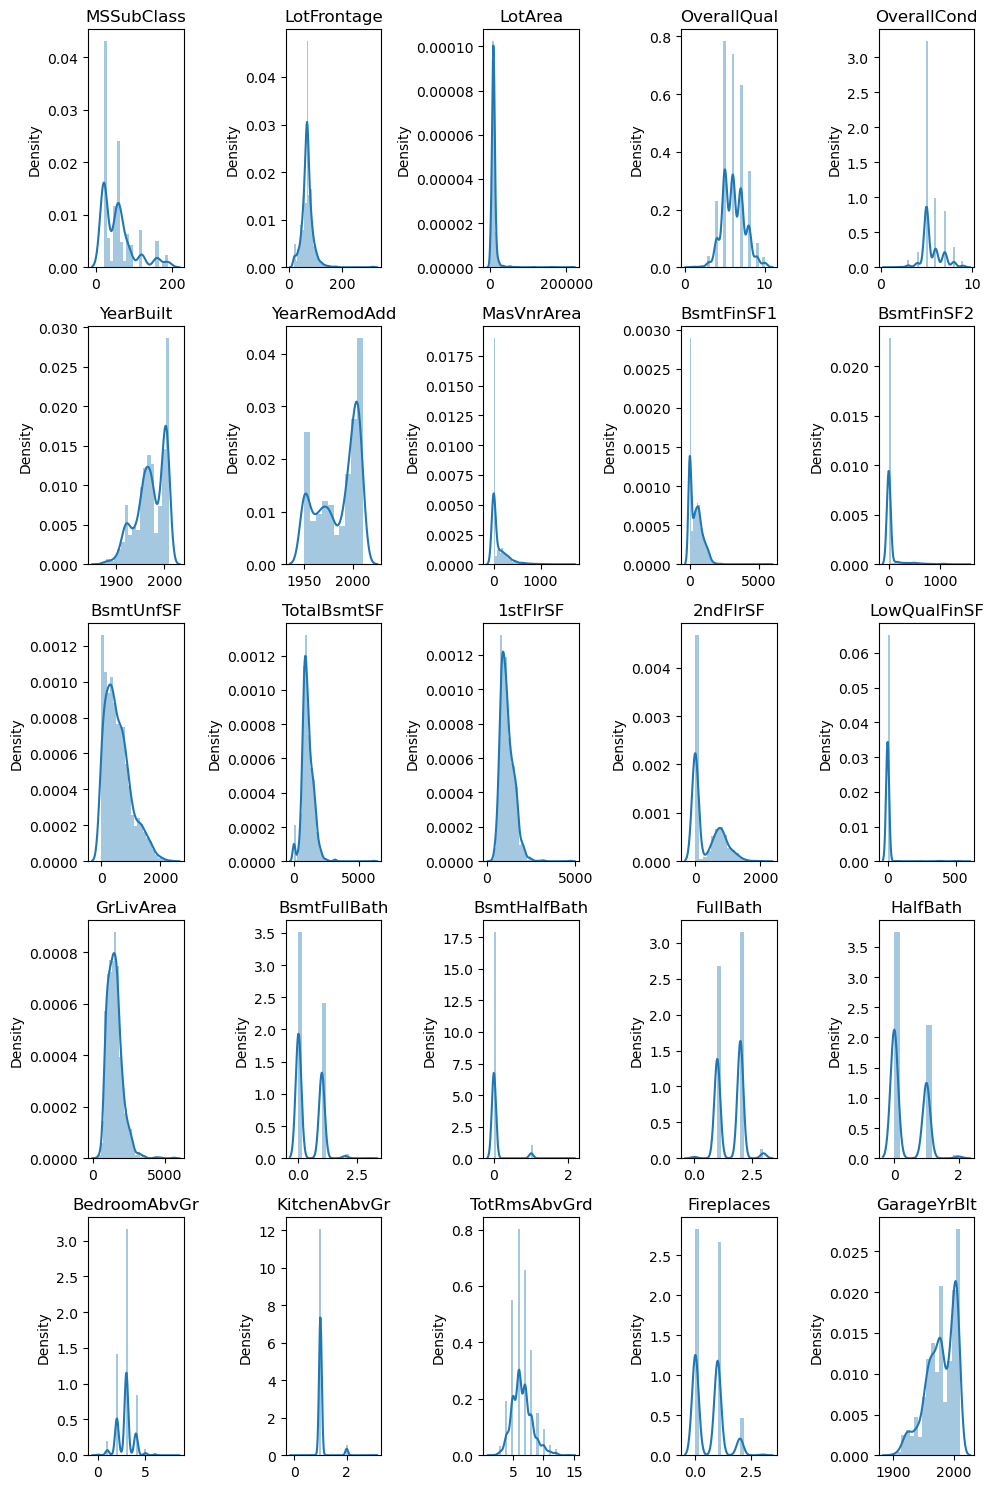

In [36]:
fig, ax = plt.subplots(5,5, figsize=(10, 15))

for i, j in zip(num1, ax.flatten()):
    sns.distplot(x=df[i], ax=j)
    j.set_title(i)  

plt.tight_layout()
plt.show()

In [37]:
col=df.select_dtypes(include='object').columns
col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
col1=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

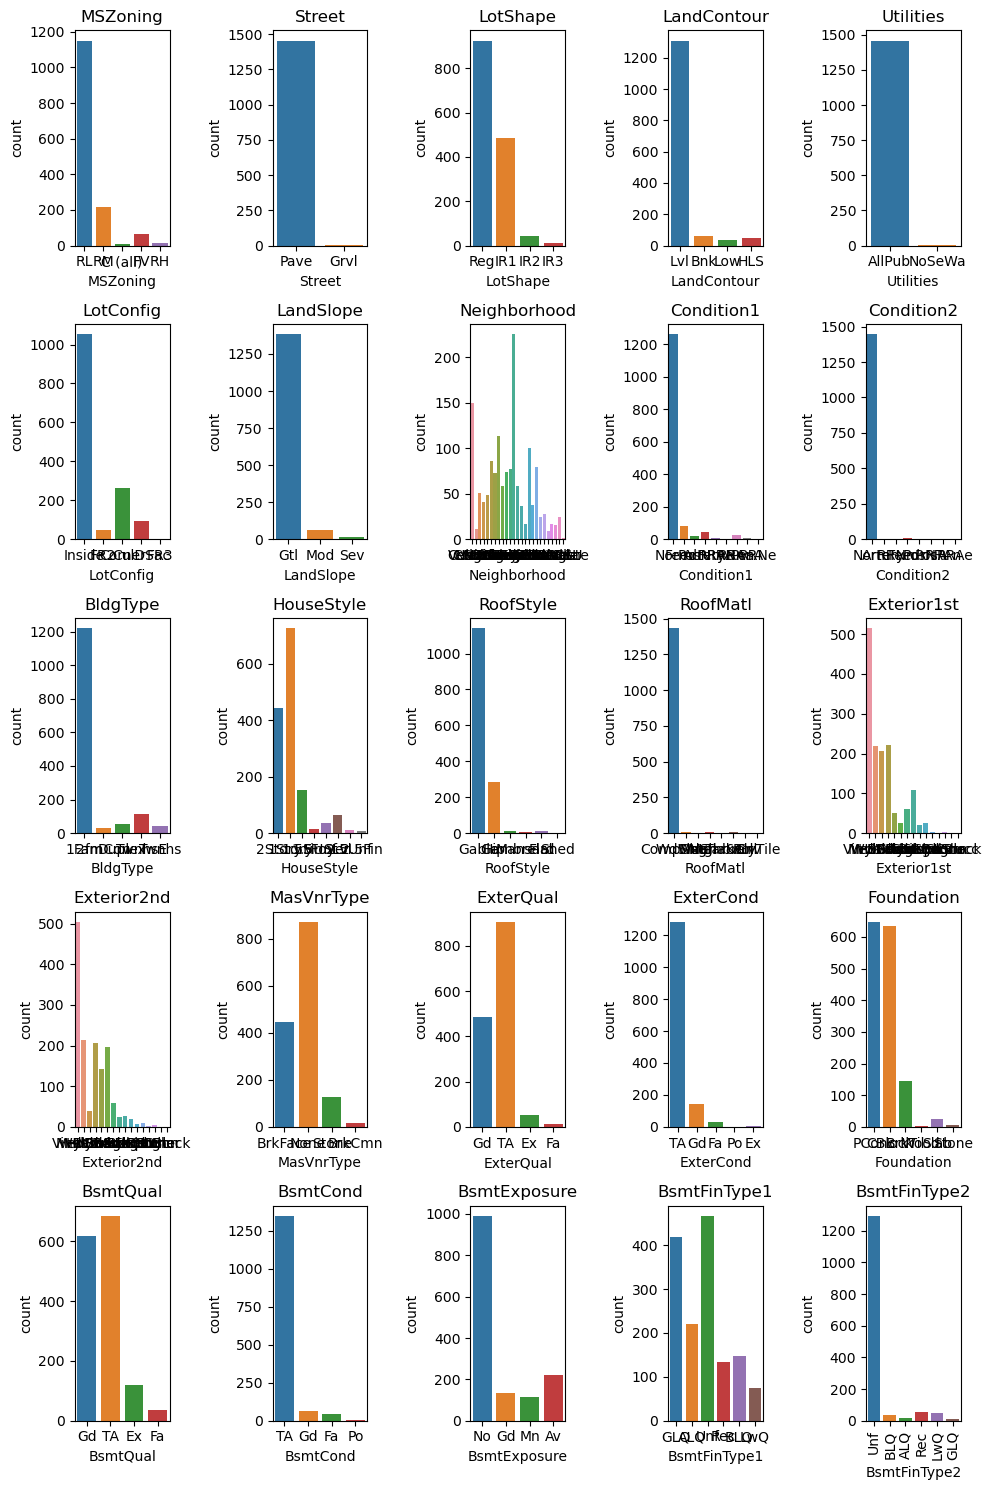

In [40]:
fig, ax = plt.subplots(5,5, figsize=(10, 15))

for i, j in zip(col1, ax.flatten()):
    sns.countplot(x=df[i], ax=j)
    j.set_title(i)  
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bivariant Analysis

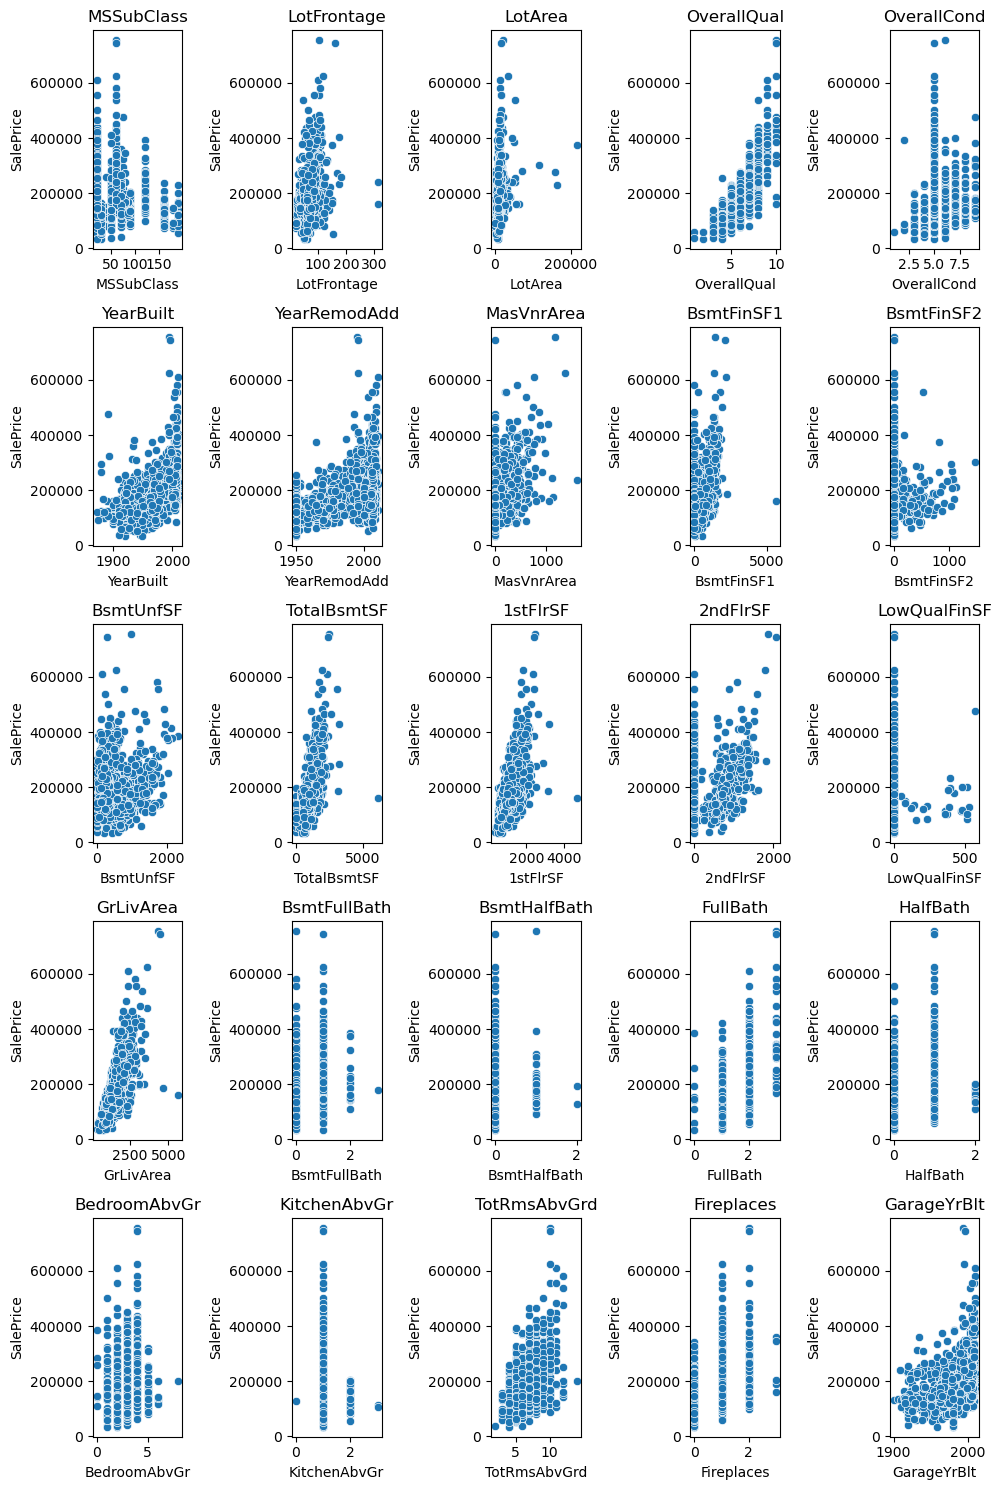

In [41]:
fig, ax = plt.subplots(5,5, figsize=(10, 15))

for i, j in zip(num1, ax.flatten()):
    sns.scatterplot(x=df[i], y=df['SalePrice'], ax=j)
    j.set_title(i)  

plt.tight_layout()
plt.show()

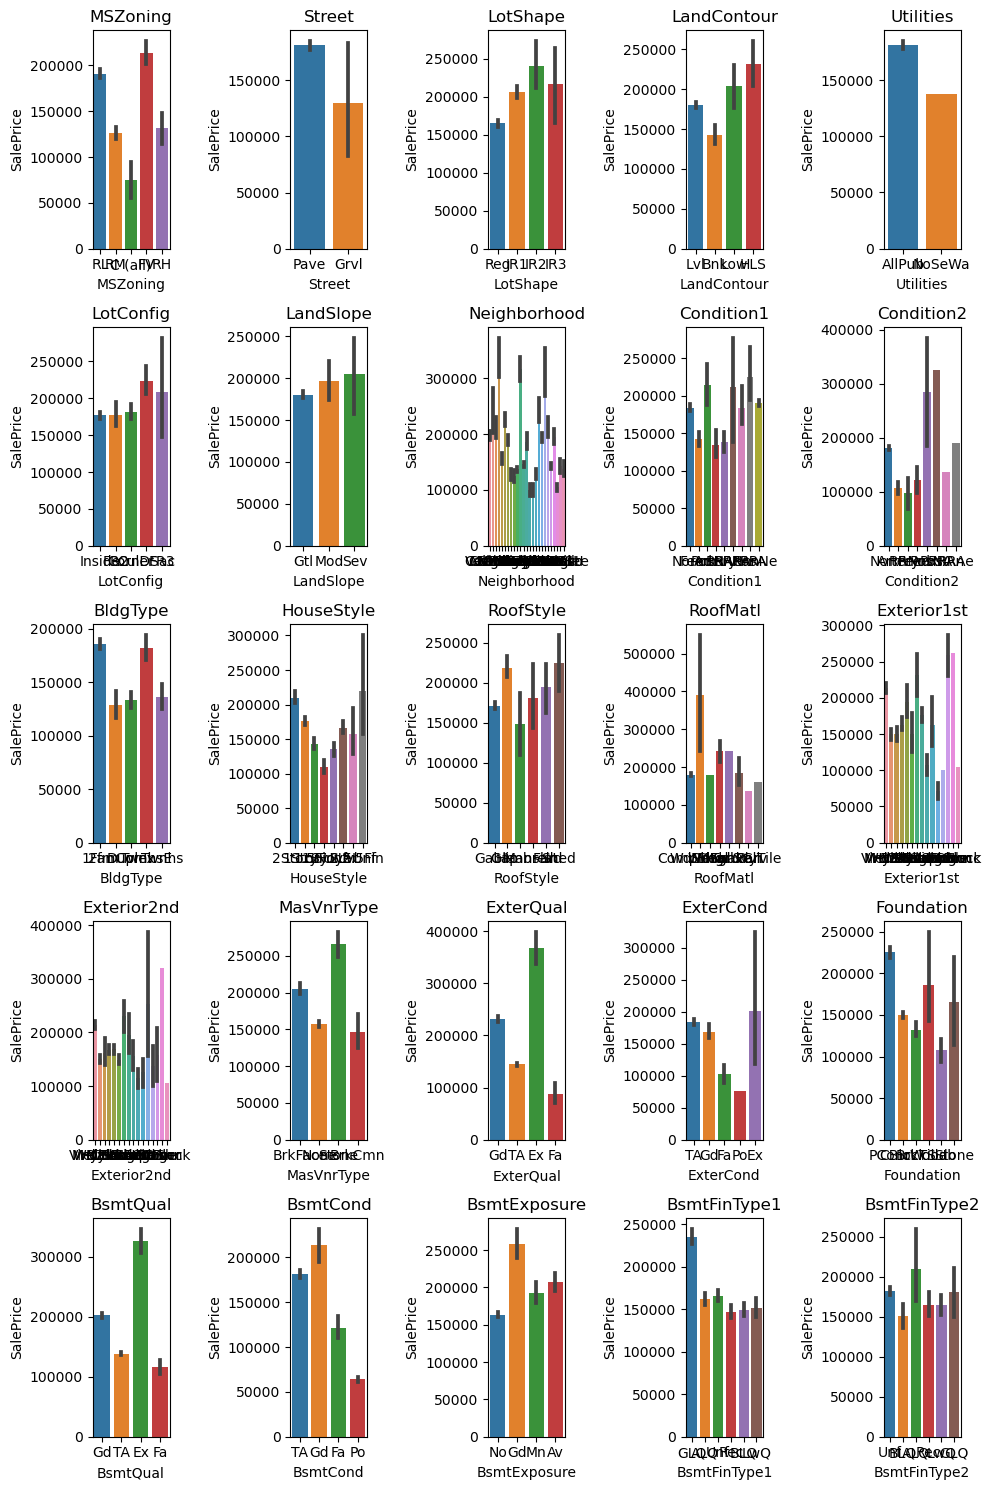

In [42]:
fig, ax = plt.subplots(5,5, figsize=(10, 15))

for i, j in zip(col1, ax.flatten()):
    sns.barplot(x=df[i], y=df['SalePrice'], ax=j)
    j.set_title(i)  

plt.tight_layout()
plt.show()

# Multivariant Analysis

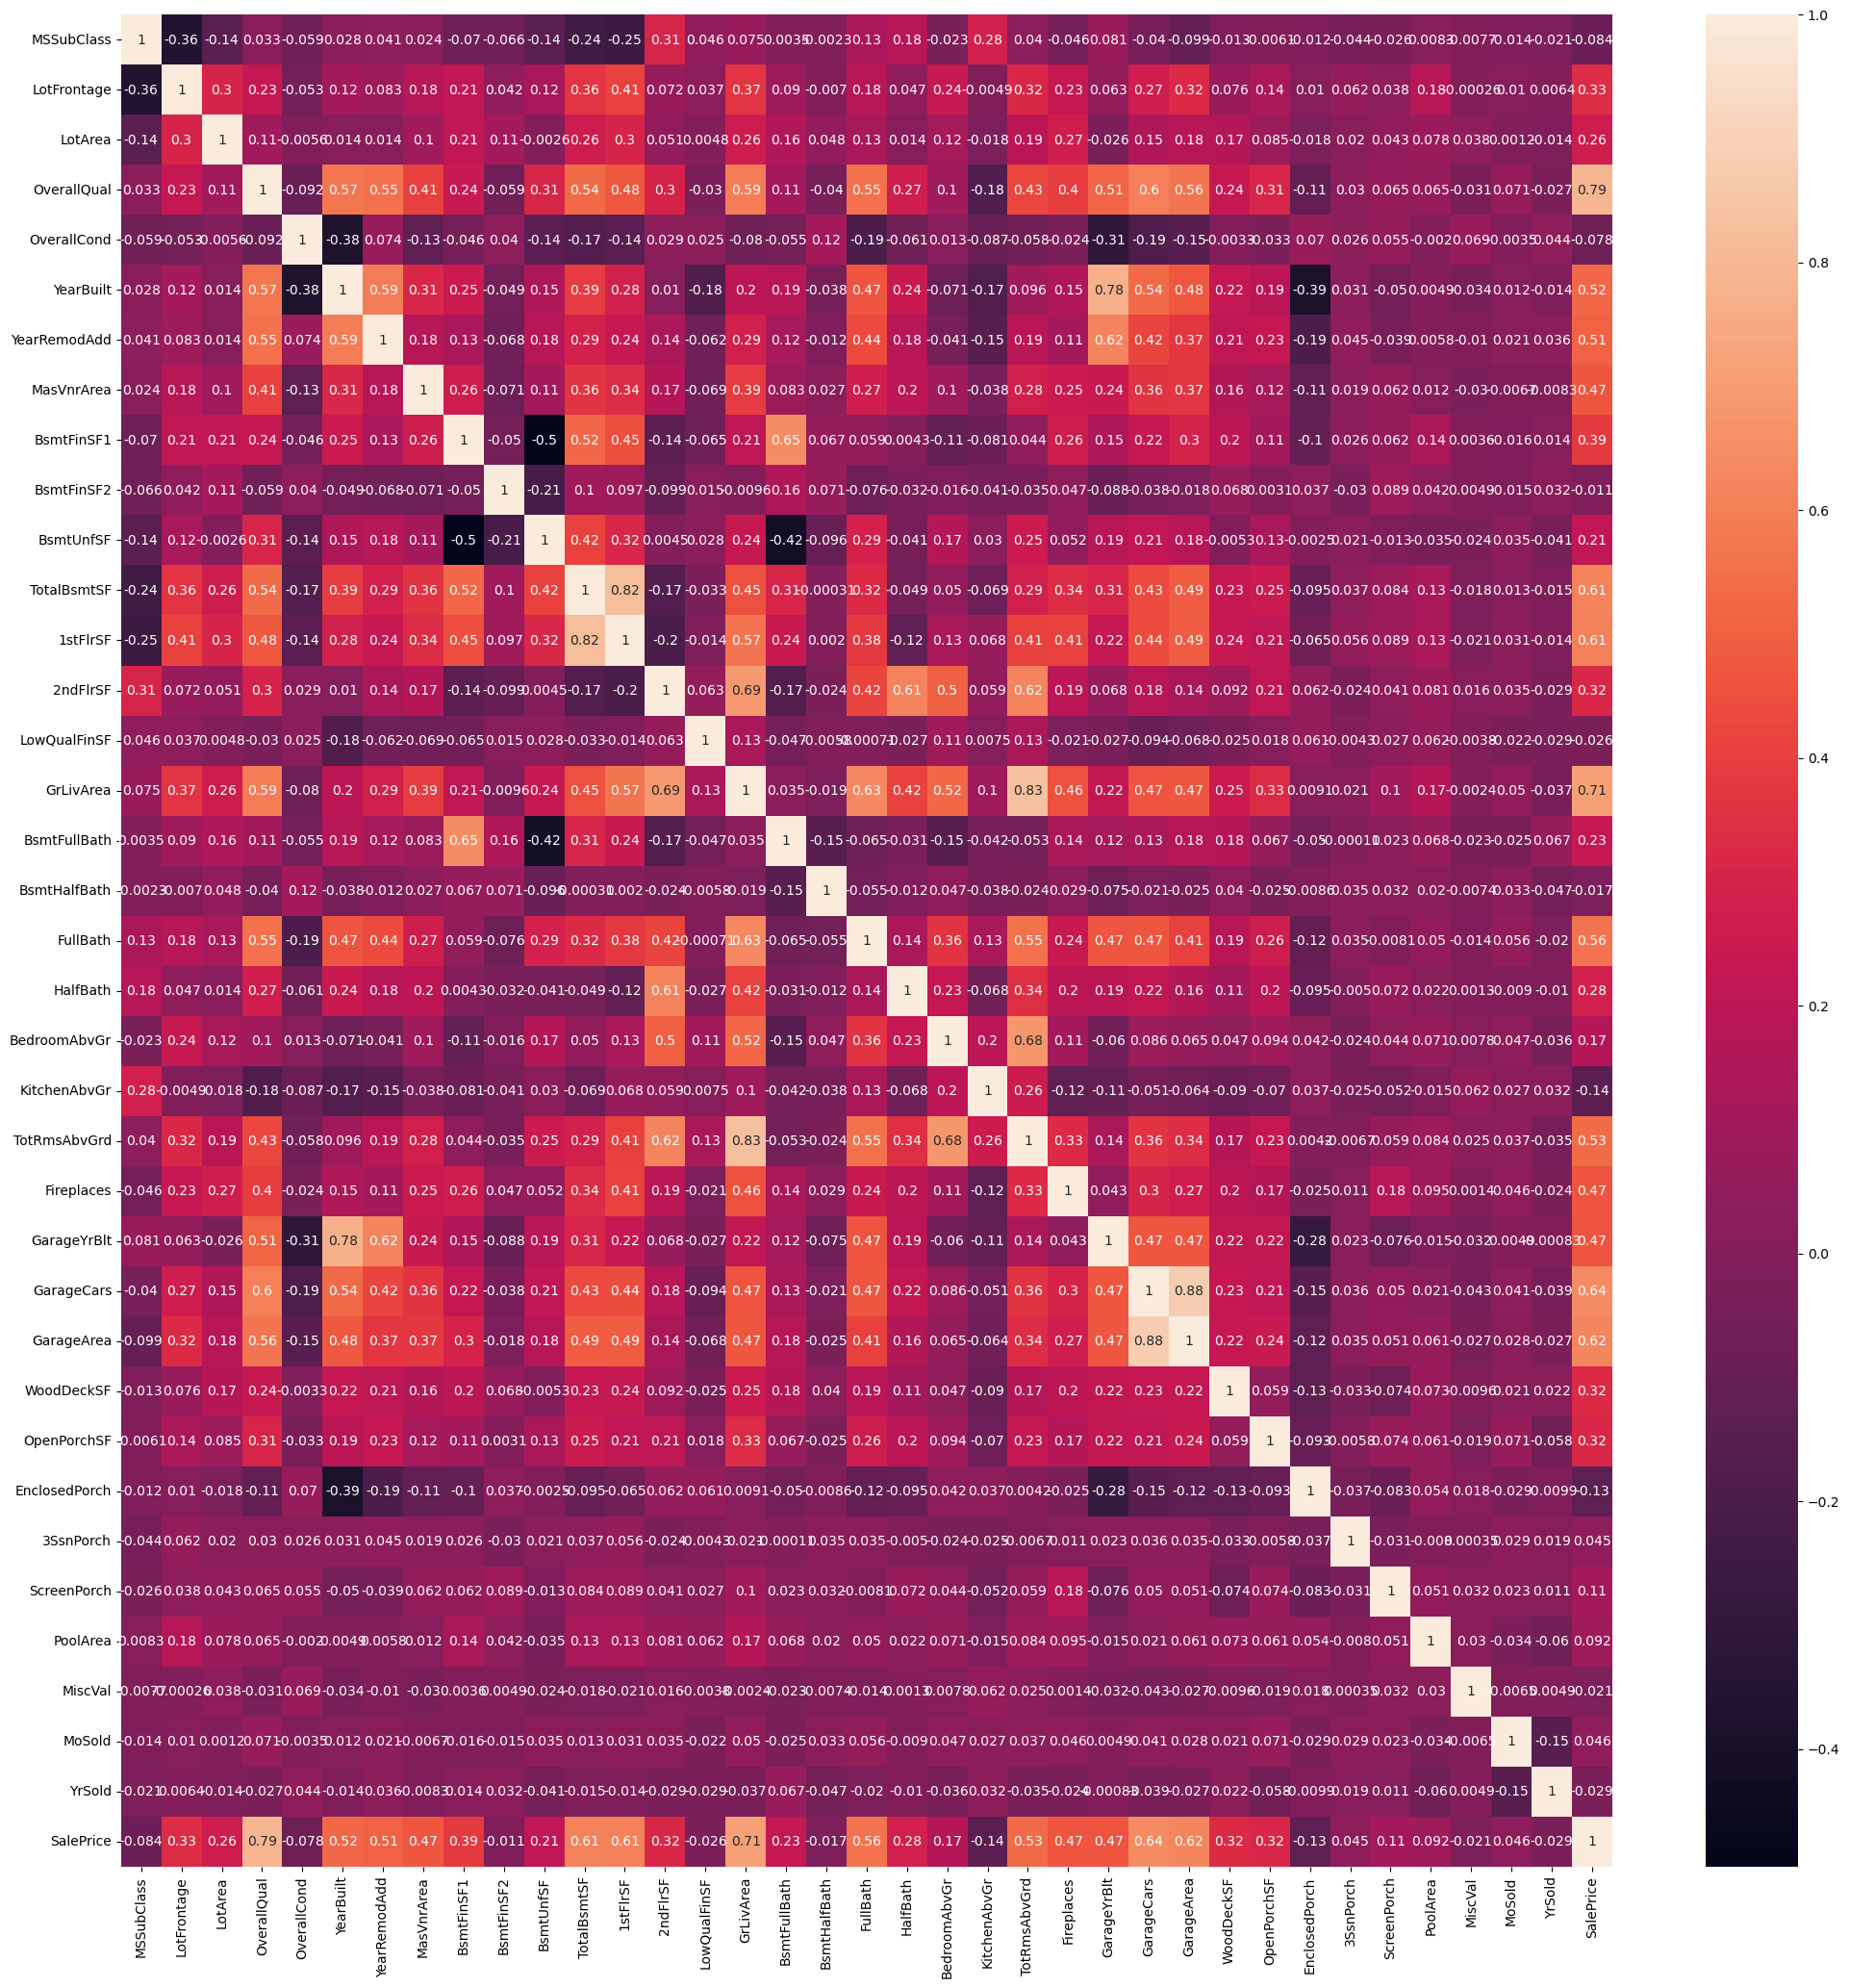

In [43]:
plt.figure(figsize=[25,25])
sns.heatmap(df.corr(),annot=True)
plt.show()

# Skewness

In [44]:
df.skew()

MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [63]:
df.select_dtypes(include=np.number).skew().sort_values(ascending=False)[(df.skew()>=1) | (df.skew()<=1)]

PoolArea         14.352680
3SsnPorch         7.613746
LowQualFinSF      7.299413
MiscVal           5.016528
BsmtHalfBath      3.859402
ScreenPorch       3.113266
BsmtFinSF2        2.425650
EnclosedPorch     2.047941
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
MasVnrArea        0.426258
TotalBsmtSF       0.232534
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
LotFrontage       0.167283
WoodDeckSF        0.132275
YrSold            0.096269
MSSubClass        0.069019
FullBath          0.036562
LotArea           0.026569
GrLivArea         0.000171
1stFlrSF         -0.001106
SalePrice        -0.008654
OpenPorchSF      -0.014772
GarageCars       -0.342549
BsmtFinSF1       -0.411401
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.678333
KitchenAbvGr     -2.800950
d

In [56]:
skewed_columns = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)[df.skew()>=1].index.tolist()

# Transformation

In [64]:
pt = PowerTransformer(method='yeo-johnson')
df[skewed_columns] = pt.fit_transform(df[skewed_columns])

In [65]:
df.select_dtypes(include=np.number).skew().sort_values(ascending=False)

PoolArea         14.352680
3SsnPorch         7.613746
LowQualFinSF      7.299413
MiscVal           5.016528
BsmtHalfBath      3.859402
ScreenPorch       3.113266
BsmtFinSF2        2.425646
EnclosedPorch     2.047921
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
MasVnrArea        0.401803
LotArea           0.282112
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
LotFrontage       0.183111
GarageArea        0.179981
WoodDeckSF        0.118497
YrSold            0.096269
MSSubClass        0.066075
TotalBsmtSF       0.037930
FullBath          0.036562
GrLivArea         0.024493
OpenPorchSF       0.005021
1stFlrSF         -0.021432
SalePrice        -0.055564
BsmtFinSF1       -0.123877
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.678333
KitchenAbvGr     -4.632754
d

In [74]:
pd.set_option('display.max_columns',None)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.494656,RL,-0.147052,-0.155498,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.227787,Gd,TA,PConc,Gd,TA,No,GLQ,0.778473,Unf,-0.359384,150,-0.394105,GasA,Ex,Y,SBrkr,-0.798615,854,-0.134652,0.525749,1,-0.243940,2,1,3,-0.164995,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,-0.952721,0.834666,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2,2008,WD,Normal,0.575041
1,-1.164932,RL,0.546220,0.091199,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.822377,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.108338,Unf,-0.359384,284,0.517048,GasA,Ex,Y,SBrkr,0.432046,0,-0.134652,-0.386196,0,4.099375,2,0,3,-0.164995,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,1.185804,-1.067577,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,5,2007,WD,Normal,0.233650
2,0.494656,RL,-0.001656,0.402712,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.209527,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.455353,Unf,-0.359384,434,-0.242099,GasA,Ex,Y,SBrkr,-0.566239,866,-0.134652,0.657063,1,-0.243940,2,1,3,-0.164995,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,-0.952721,0.653569,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,9,2008,WD,Normal,0.744152
3,0.698976,RL,-0.398094,0.081031,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.822377,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.079896,Unf,-0.359384,540,-0.639023,GasA,Gd,Y,SBrkr,-0.426533,756,-0.134652,0.538078,1,-0.243940,1,0,3,-0.164995,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,-0.952721,0.566429,2.453438,-0.129279,-0.293785,-0.069409,-0.192177,2,2006,WD,Abnorml,-0.420420
4,0.494656,RL,0.718326,0.877027,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.277056,Gd,TA,PConc,Gd,TA,Av,GLQ,0.709133,Unf,-0.359384,490,0.266327,GasA,Ex,Y,SBrkr,0.128379,1053,-0.134652,1.285930,1,-0.243940,2,1,4,-0.164995,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,1.076454,0.992509,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,12,2008,WD,Normal,1.014372


# Encoding

In [80]:
encode_columns = df.select_dtypes(include='O').columns.tolist()

In [83]:
for i in encode_columns:
    print(i)
    print()
    print(df[i].unique())
    print()

MSZoning

['RL' 'RM' 'C (all)' 'FV' 'RH']

Street

['Pave' 'Grvl']

LotShape

['Reg' 'IR1' 'IR2' 'IR3']

LandContour

['Lvl' 'Bnk' 'Low' 'HLS']

Utilities

['AllPub' 'NoSeWa']

LotConfig

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope

['Gtl' 'Mod' 'Sev']

Neighborhood

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

Exterior1st

['VinylSd' 'Metal

In [84]:
from sklearn.preprocessing import *

In [86]:
le = LabelEncoder()
for col in encode_columns:
    df[col] = le.fit_transform(df[col])

In [88]:
df.select_dtypes(include='O').columns

Index([], dtype='object')

 All categorical columns had been encoded by label encoder technique

# ML - Models

In [91]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=10)

In [93]:
perf_score_test = pd.DataFrame(columns=["Model", 'Mean Squared Error', 'R-squared'])

def update_performance_test(name, model, test, pred):
    global perf_score_test
    perf_score_test = perf_score_test.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(test, pred),
        'R-squared': r2_score(test, pred)
    }, ignore_index=True)



In [94]:
model = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaboostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBoostRegressor": XGBRegressor(),
}

for clf_name, clf in model.items():
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    update_performance_test(clf_name, clf, ytest, ypred)

perf_score_test

,Model,Mean Squared Error,R-squared
0,LinearRegression,0.129151,0.878444
1,DecisionTreeRegressor,0.296213,0.721206
2,RandomForestRegressor,0.150078,0.858747
3,AdaboostRegressor,0.236997,0.776940
4,GradientBoostingRegressor,0.116636,0.890222
5,XGBoostRegressor,0.132644,0.875156


In [102]:
gb = GradientBoostingRegressor().fit(xtrain,ytrain)
y_pred_gb = gb.predict(xtest)

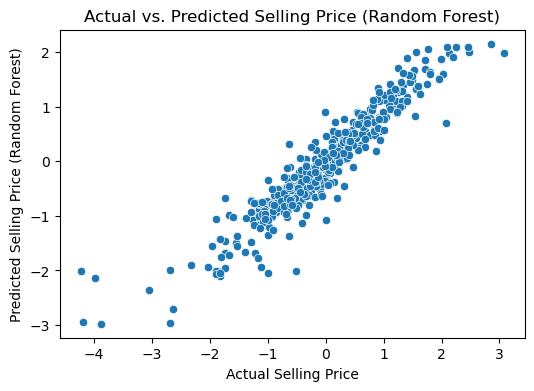

In [104]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=ytest, y=y_pred_gb)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()

As we can see from above scatter plot that datapoints are close to eachother we can say that our model works well.

In [97]:
perf_score_train = pd.DataFrame(columns=["Model", 'Mean Squared Error', 'R-squared'])

def update_performance_train(name, model, train, pred):
    global perf_score_train
    perf_score_train = perf_score_train.append({
        'Model': name,
        'Mean Squared Error': mean_squared_error(train, pred),
        'R-squared': r2_score(train, pred)
    }, ignore_index=True)



In [98]:
model = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaboostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBoostRegressor": XGBRegressor(),
}

for clf_name, clf in model.items():
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtrain)
    update_performance_train(clf_name, clf, ytrain, ypred)

perf_score_train

,Model,Mean Squared Error,R-squared
0,LinearRegression,0.097875,0.899324
1,DecisionTreeRegressor,0.000000,1.000000
2,RandomForestRegressor,0.018213,0.981266
3,AdaboostRegressor,0.141095,0.854867
4,GradientBoostingRegressor,0.033386,0.965658
5,XGBoostRegressor,0.000092,0.999906


In [99]:
perf_score_train.rename(columns={'Model': 'Train_Model'}, inplace=True)
perf_score_test.rename(columns={'Model': 'Test_Model'}, inplace=True)

In [100]:
result =pd.concat([perf_score_train.loc[:,['Train_Model','Mean Squared Error','R-squared']], perf_score_test.loc[:, ['Test_Model','Mean Squared Error','R-squared']]], axis=1)

In [101]:
result

,Train_Model,Mean Squared Error,R-squared,Test_Model,Mean Squared Error,R-squared
0,LinearRegression,0.097875,0.899324,LinearRegression,0.129151,0.878444
1,DecisionTreeRegressor,0.000000,1.000000,DecisionTreeRegressor,0.296213,0.721206
2,RandomForestRegressor,0.018213,0.981266,RandomForestRegressor,0.150078,0.858747
3,AdaboostRegressor,0.141095,0.854867,AdaboostRegressor,0.236997,0.776940
4,GradientBoostingRegressor,0.033386,0.965658,GradientBoostingRegressor,0.116636,0.890222
5,XGBoostRegressor,0.000092,0.999906,XGBoostRegressor,0.132644,0.875156


# Top 3 Features


In [105]:
feature_imp_gb = pd.DataFrame()
feature_imp_gb['Feature']=xtrain.columns
feature_imp_gb['Importance']=gb.feature_importances_

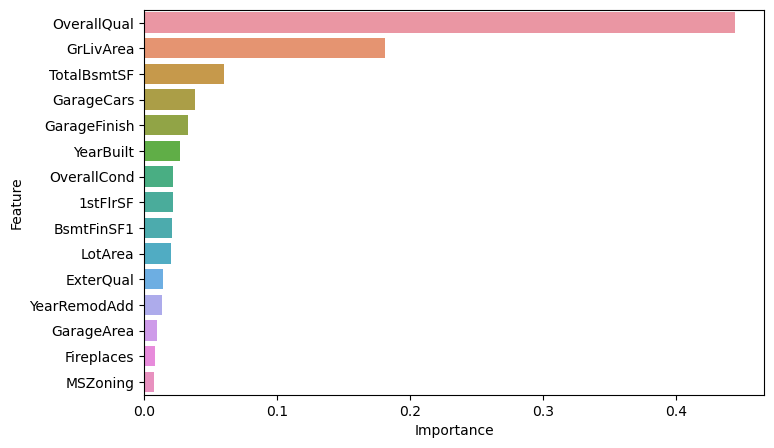

In [110]:
feature_imp_gb = feature_imp_gb.sort_values('Importance',ascending=False)
plt.figure(figsize= [8,5])
sns.barplot(x='Importance',y='Feature',data=feature_imp_gb.iloc[0:15])
plt.show()

# Results


# Among all models built, the Linear Regression model gives the best performance with R2 of 87% in test environment. 

# Linear Regression Model will be best-suited model for predicting the selling price of the house.

# The top 7 features which play a vital role in determining the selling price of the house are OverallQual, GrLivArea, TotalBsmtSF, GarageCars, GarageFinish, YearBuilt, OverallCond.

# Which denotes that the overall quality and condition of the house, the age and size of the house and the capacity of car garage of the house play an important role in selling price of the house. 